## DATA MINING PROJECT  - Customer Segmentation

**Group EZ**  
**Group Members:**  
Beatriz Carmo - 20220685  
Marta Antunes - 20221094  
Tomás Corte-Real - 20221639

**Msc:** Data Science and Advanced Analytics - Major in Bussiness Ananlytics @ NOVA IMS  
**Course:** Data Mining - 2022/2023

GitHub Repository Link: https://github.com/BeatrizC25/DataMiningProject22-23.git

# Table of Contents

# 1. Imports

In [1]:
%autosave 90

import warnings
warnings.filterwarnings('ignore')

import os
from os.path import join
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from math import ceil
from math import floor
from pandas_profiling import ProfileReport
from sklearn.impute import KNNImputer

sns.set()

Autosaving every 90 seconds


## 2. Loading and Processing Data

In [34]:
#loading file into a dataframe
df_original=pd.read_sas('a2z_insurance.sas7bdat')

In [35]:
#create a copy of the original dataframe
df=df_original.copy()

In [36]:
#check how many rows and columns the dataset has
print('The dataset has a total of', df.shape[0], 'rows and', df.shape[1], 'columns.')

The dataset has a total of 10296 rows and 14 columns.


**Notice there are 10296 columns in the dataset and only 10290 costumers.**

In [37]:
df.set_index('CustID', inplace=True) #change index to costumer id
df.head(20)

,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,,,,,
1.0,1985.0,1982.0,b'2 - High School',2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89
2.0,1981.0,1995.0,b'2 - High School',677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
3.0,1991.0,1970.0,b'1 - Basic',2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02
4.0,1990.0,1981.0,b'3 - BSc/MSc',1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34
5.0,1986.0,1973.0,b'3 - BSc/MSc',1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45
6.0,1986.0,1956.0,b'2 - High School',2566.0,4.0,1.0,-24.33,1.00,440.75,18.90,114.80,7.00,7.67
7.0,1979.0,1943.0,b'2 - High School',4103.0,4.0,0.0,-66.01,1.05,156.92,295.60,317.95,14.67,26.34
8.0,1988.0,1974.0,b'2 - High School',1743.0,4.0,1.0,-144.91,1.13,248.27,397.30,144.36,66.68,53.23
9.0,1981.0,1978.0,b'3 - BSc/MSc',1862.0,1.0,1.0,356.53,0.36,344.51,18.35,210.04,8.78,9.89


In [6]:
#checking for ducplicates in dataset
df.duplicated(df.columns).sum()

3

In [7]:
#remove duplicated rows
df.drop_duplicates(df.columns, inplace = True)
print('Now, the dataset has', df.shape[0], 'rows.')

Now, the dataset has 10293 rows.


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 10293 entries, 1.0 to 10296.0
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FirstPolYear   10263 non-null  float64
 1   BirthYear      10276 non-null  float64
 2   EducDeg        10276 non-null  object 
 3   MonthSal       10257 non-null  float64
 4   GeoLivArea     10292 non-null  float64
 5   Children       10272 non-null  float64
 6   CustMonVal     10293 non-null  float64
 7   ClaimsRate     10293 non-null  float64
 8   PremMotor      10259 non-null  float64
 9   PremHousehold  10293 non-null  float64
 10  PremHealth     10250 non-null  float64
 11  PremLife       10189 non-null  float64
 12  PremWork       10207 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.1+ MB


In [9]:
#cheking how many missing values are in dataset
df.isna().sum()

FirstPolYear      30
BirthYear         17
EducDeg           17
MonthSal          36
GeoLivArea         1
Children          21
CustMonVal         0
ClaimsRate         0
PremMotor         34
PremHousehold      0
PremHealth        43
PremLife         104
PremWork          86
dtype: int64

**There are several missing values in different features.**  
This issue will be adressed and taken care of later in this analysis.

In [10]:
df.columns

Index(['FirstPolYear', 'BirthYear', 'EducDeg', 'MonthSal', 'GeoLivArea',
       'Children', 'CustMonVal', 'ClaimsRate', 'PremMotor', 'PremHousehold',
       'PremHealth', 'PremLife', 'PremWork'],
      dtype='object')

The dataset has both **categorical features** (EducDeg, GeoLivArea, Children) and numeric ones. Some of the categorical feautres are types as being **floats** (this is the case of GeoLivArea and Children) **instead of objects**. This can pose a future issue, therefore those categorical features must have their type corrected.

In [11]:
#correcting the type of categorical features
df['GeoLivArea']=df['GeoLivArea'].astype(object)
df['Children']=df['Children'].astype(object)

Let's take a look into the descriptive statistics! 

In [12]:
df.describe().T #this only includes numeric features

,count,mean,std,min,25%,50%,75%,max
FirstPolYear,10263.0,1991.064893,511.342617,1974.00,1980.00,1986.00,1992.00,53784.00
BirthYear,10276.0,1968.006909,19.710742,1028.00,1953.00,1968.00,1983.00,2001.00
MonthSal,10257.0,2506.618699,1157.518390,333.00,1706.00,2502.00,3290.00,55215.00
CustMonVal,10293.0,177.929963,1946.091554,-165680.42,-9.44,187.03,399.86,11875.89
ClaimsRate,10293.0,0.742728,2.917385,0.00,0.39,0.72,0.98,256.20
PremMotor,10259.0,300.501550,211.937740,-4.11,190.59,298.61,408.30,11604.42
PremHousehold,10293.0,210.419863,352.635041,-75.00,49.45,132.80,290.05,25048.80
PremHealth,10250.0,171.553183,296.444399,-2.11,111.80,162.81,219.04,28272.00
PremLife,10189.0,41.848724,47.484264,-7.00,9.89,25.56,57.79,398.30
PremWork,10207.0,41.283712,51.519022,-12.00,10.67,25.67,56.79,1988.70


Now let's check the **coherence of the data**!  
Assumptions:  
 - One cannot be more than 120 years-old
 - One cannot have their 1st year policy after 2016
 - One cannot have their birth year be after their 1st year policy
 - One cannot be less than 16 and not have finished high school to have a job 
 - One cannot have finished their degree with less than 18 years-old
 - One cannot spend more money than they own  

In [13]:
#removing all incoherent rows from dataset 
df.drop(df[(df.BirthYear<1896)|(df.BirthYear>2016)].index, inplace = True)
df.drop(df[df.FirstPolYear>2016].index, inplace=True)
df.drop(df[df.BirthYear>df.FirstPolYear].index, inplace=True)
df.drop(df[(df.BirthYear>2000) & (df.MonthSal>0) & (df.EducDeg==b'1 - Basic')].index, inplace=True)
df.drop(df[(df.BirthYear>1998) & ((df.EducDeg==b'3 - BSc/MSc')|(df.EducDeg==b'4 - PhD'))].index,
                                  inplace=True)

In [14]:
#create function to compute the sum of the values of Premiums of each row
def sum_(*args):
    tot=0
    for x in args:
        tot+=x
    return tot

df.drop(df[sum_(df.PremMotor, df.PremHousehold, df.PremHealth, df.PremLife, df.PremWork)>df.MonthSal].index,
       inplace=True)

After removing incoherent rows, let's check if there are any incoherencies left.

In [15]:
print((df.BirthYear<1896).sum(), (df.BirthYear>2016).sum(), (df.FirstPolYear>2016).sum(),
(df.BirthYear>df.FirstPolYear).sum(),((df.BirthYear>2000) & (df.MonthSal>0) & (df.EducDeg==b'1 - Basic')).sum(),
((df.BirthYear>1998) & ((df.EducDeg==b'3 - BSc/MSc')|(df.EducDeg==b'4 - PhD'))).sum(),
(sum_(df.PremMotor, df.PremHousehold, df.PremHealth, df.PremLife, df.PremWork)>df.MonthSal).sum())

0 0 0 0 0 0 0


There are no incoherent values!

**Divide and conquer!**  
Let's now devide the several features into **numeric** and **non-numeric** ones to ease future steps in this analysis.

In [16]:
#dividing features and store them into 2 lists
non_metric_feat = ["EducDeg", "GeoLivArea", "Children"]
metric_feat = df.columns.drop(non_metric_feat).to_list()

### Outliers

Let's start by vizualizing our data with the help of some graphics.

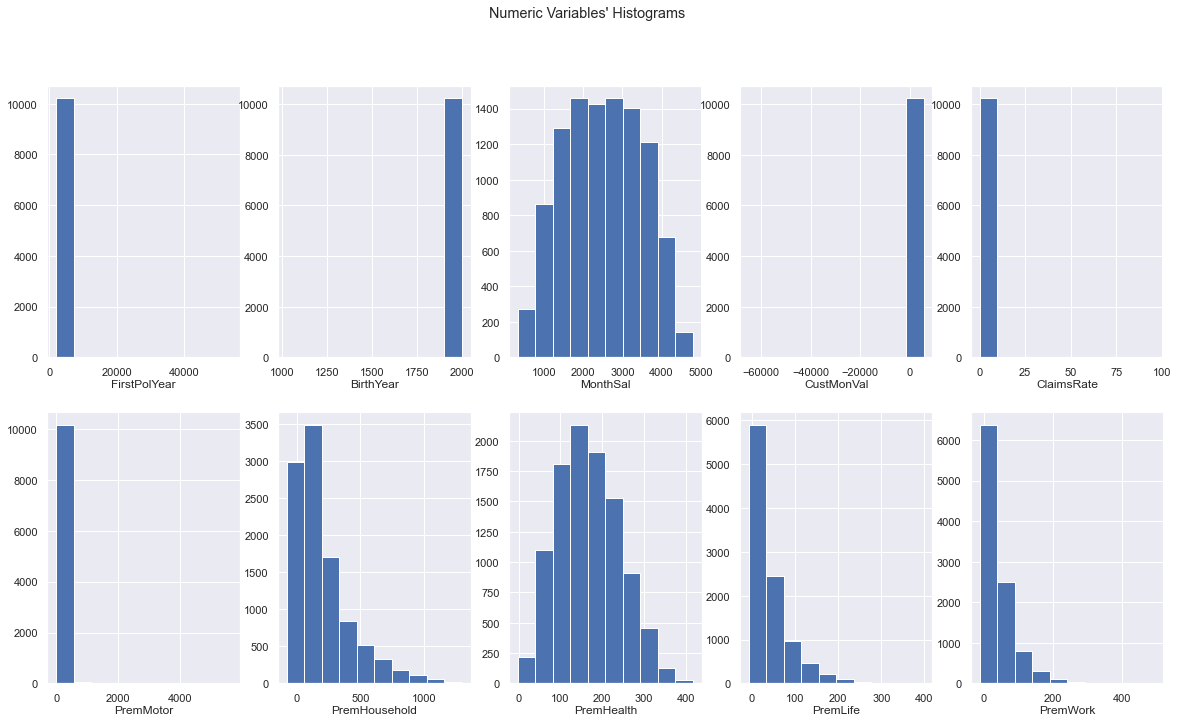

In [49]:
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(metric_feat) / 2), figsize=(20, 11))

# Plot data
for ax, feat in zip(axes.flatten(), metric_feat): 
    ax.hist(df[feat])
    ax.set_title(feat, y=-0.13)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

plt.show()

It looks like there are some outliers in PremHousegold, PremLife and PremHealth. We will confirm this using box-plots:

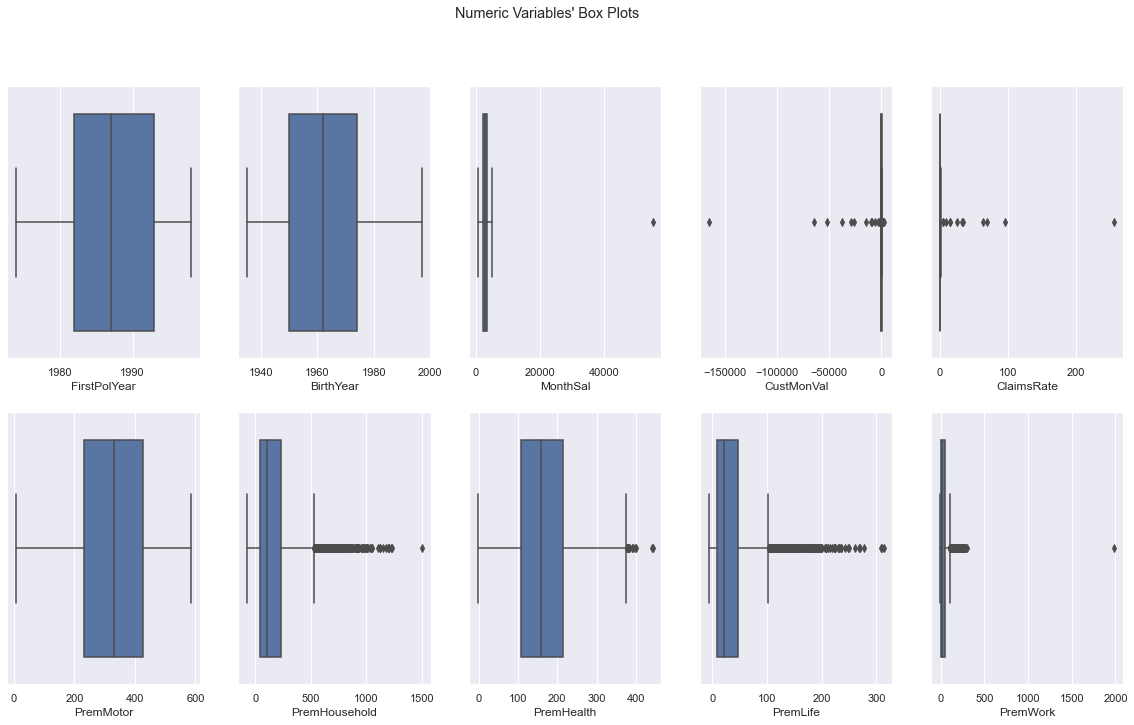

In [18]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_feat) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_feat): # Notice the zip() function and flatten() method
    sns.boxplot(x=df[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

Here we see there are many variables with outliers: MonthSal, CustMonVal, ClaimsRate, PremHousehold, PremHealth, PremLife and PremWork. These outliers will be removed.

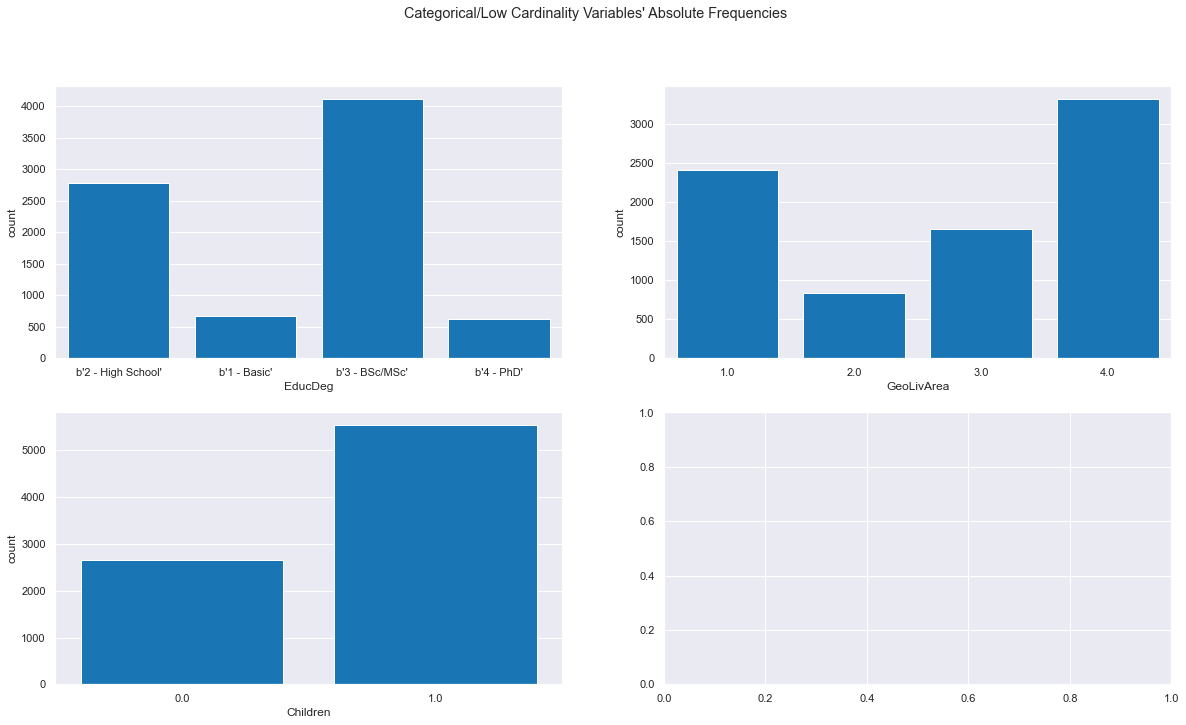

In [19]:
# All Non-Metric Variables' Absolute Frequencies
sns.set()

# Prepare figure. Create individual axes where each bar plot will be placed
fig, axes = plt.subplots(2, ceil(len(non_metric_feat) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each bar plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), non_metric_feat): # Notice the zip() function and flatten() method
    sns.countplot(x=df[feat].astype(object), ax=ax, color='#007acc')

title = "Categorical/Low Cardinality Variables' Absolute Frequencies"
plt.suptitle(title)

plt.show()

In [50]:
print((df.MonthSal>4500).sum(),
      (df.CustMonVal<-100000).sum(),
      (df.ClaimsRate>200).sum(),
      (df.PremWork>1750).sum(), 
      (df.PremHousehold>1300).sum(), 
      (df.PremHealth>430).sum(),
      (df.PremLife>300).sum())

55 0 0 0 0 0 15


In [52]:
df1=df
df1.drop(df1[(df1.MonthSal>4500)].index, inplace = True) #55 rows removed
df1.drop(df1[(df1.CustMonVal<-100000)].index, inplace = True) #1 row removed
df1.drop(df1[(df1.ClaimsRate>200)].index, inplace = True) #1 rows removed
df1.drop(df1[(df1.PremWork>1750)].index, inplace = True) #1 row removed
df1.drop(df1[(df1.PremHealth>430)].index, inplace=True) #2 rows removed
df1.drop(df1[(df1.PremLife>430)].index, inplace=True) #3 rows removed
df1.drop(df1[df1.PremHousehold>1300].index, inplace=True) #32 rows removed
print('Percentage of data kept after removing outliers:', np.round(df1.shape[0] / df_original.shape[0], 4))

Percentage of data kept after removing outliers: 0.9893


In [22]:
#df.profile_report()

In [54]:
df=df1
df.isna().sum()

FirstPolYear      30
BirthYear         17
EducDeg           17
MonthSal          36
GeoLivArea         1
Children          21
CustMonVal         0
ClaimsRate         0
PremMotor         34
PremHousehold      0
PremHealth        43
PremLife         104
PremWork          85
dtype: int64

In [24]:
# Creating new df copy to explore neighbordhood imputation
df_comp = df.copy()
# Seeing rows with NaNs
nans_index = df_comp.isna().any(axis=1)
imputer = KNNImputer(n_neighbors=10, weights="uniform")
df_comp[metric_feat] = imputer.fit_transform(df_comp[metric_feat])

In [25]:
df_comp.isna().sum()

FirstPolYear      0
BirthYear         0
EducDeg          16
MonthSal          0
GeoLivArea        1
Children         17
CustMonVal        0
ClaimsRate        0
PremMotor         0
PremHousehold     0
PremHealth        0
PremLife          0
PremWork          0
dtype: int64

In [26]:
modes=df_comp[non_metric_feat].mode().loc[0]
df_comp.fillna(modes, inplace=True)

In [27]:
df_comp.isna().sum()

FirstPolYear     0
BirthYear        0
EducDeg          0
MonthSal         0
GeoLivArea       0
Children         0
CustMonVal       0
ClaimsRate       0
PremMotor        0
PremHousehold    0
PremHealth       0
PremLife         0
PremWork         0
dtype: int64

### Feature extraction

In [28]:
df['Age']=df['BirthYear']
df['Age'] = 2016 - df['BirthYear']
df['PremTotal']=df['PremMotor']+df['PremHousehold']+df['PremHealth']+df['PremLife']+df['PremWork']
df.head()

,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,Age,PremTotal
CustID,,,,,,,,,,,,,,,
1.0,1985.0,1982.0,b'2 - High School',2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89,34.0,665.56
3.0,1991.0,1970.0,b'1 - Basic',2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02,46.0,740.60
4.0,1990.0,1981.0,b'3 - BSc/MSc',1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34,35.0,600.68
5.0,1986.0,1973.0,b'3 - BSc/MSc',1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45,43.0,629.24
6.0,1986.0,1956.0,b'2 - High School',2566.0,4.0,1.0,-24.33,1.00,440.75,18.90,114.80,7.00,7.67,60.0,589.12


In [29]:
#metric_feat.append('Age')
#metric_feat.append('PremTotal')

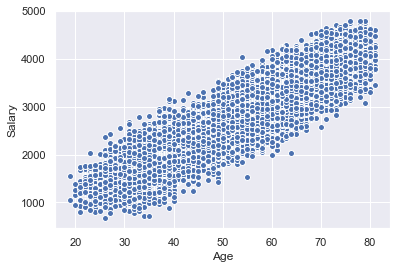

In [30]:
# Single Metric Variable Scatter plot
plt.scatter(df["Age"], df["MonthSal"], edgecolors="white")
plt.xlabel("Age")
plt.ylabel("Salary")

plt.show()

It looks like there is a linear relation between Age and Month Salary.

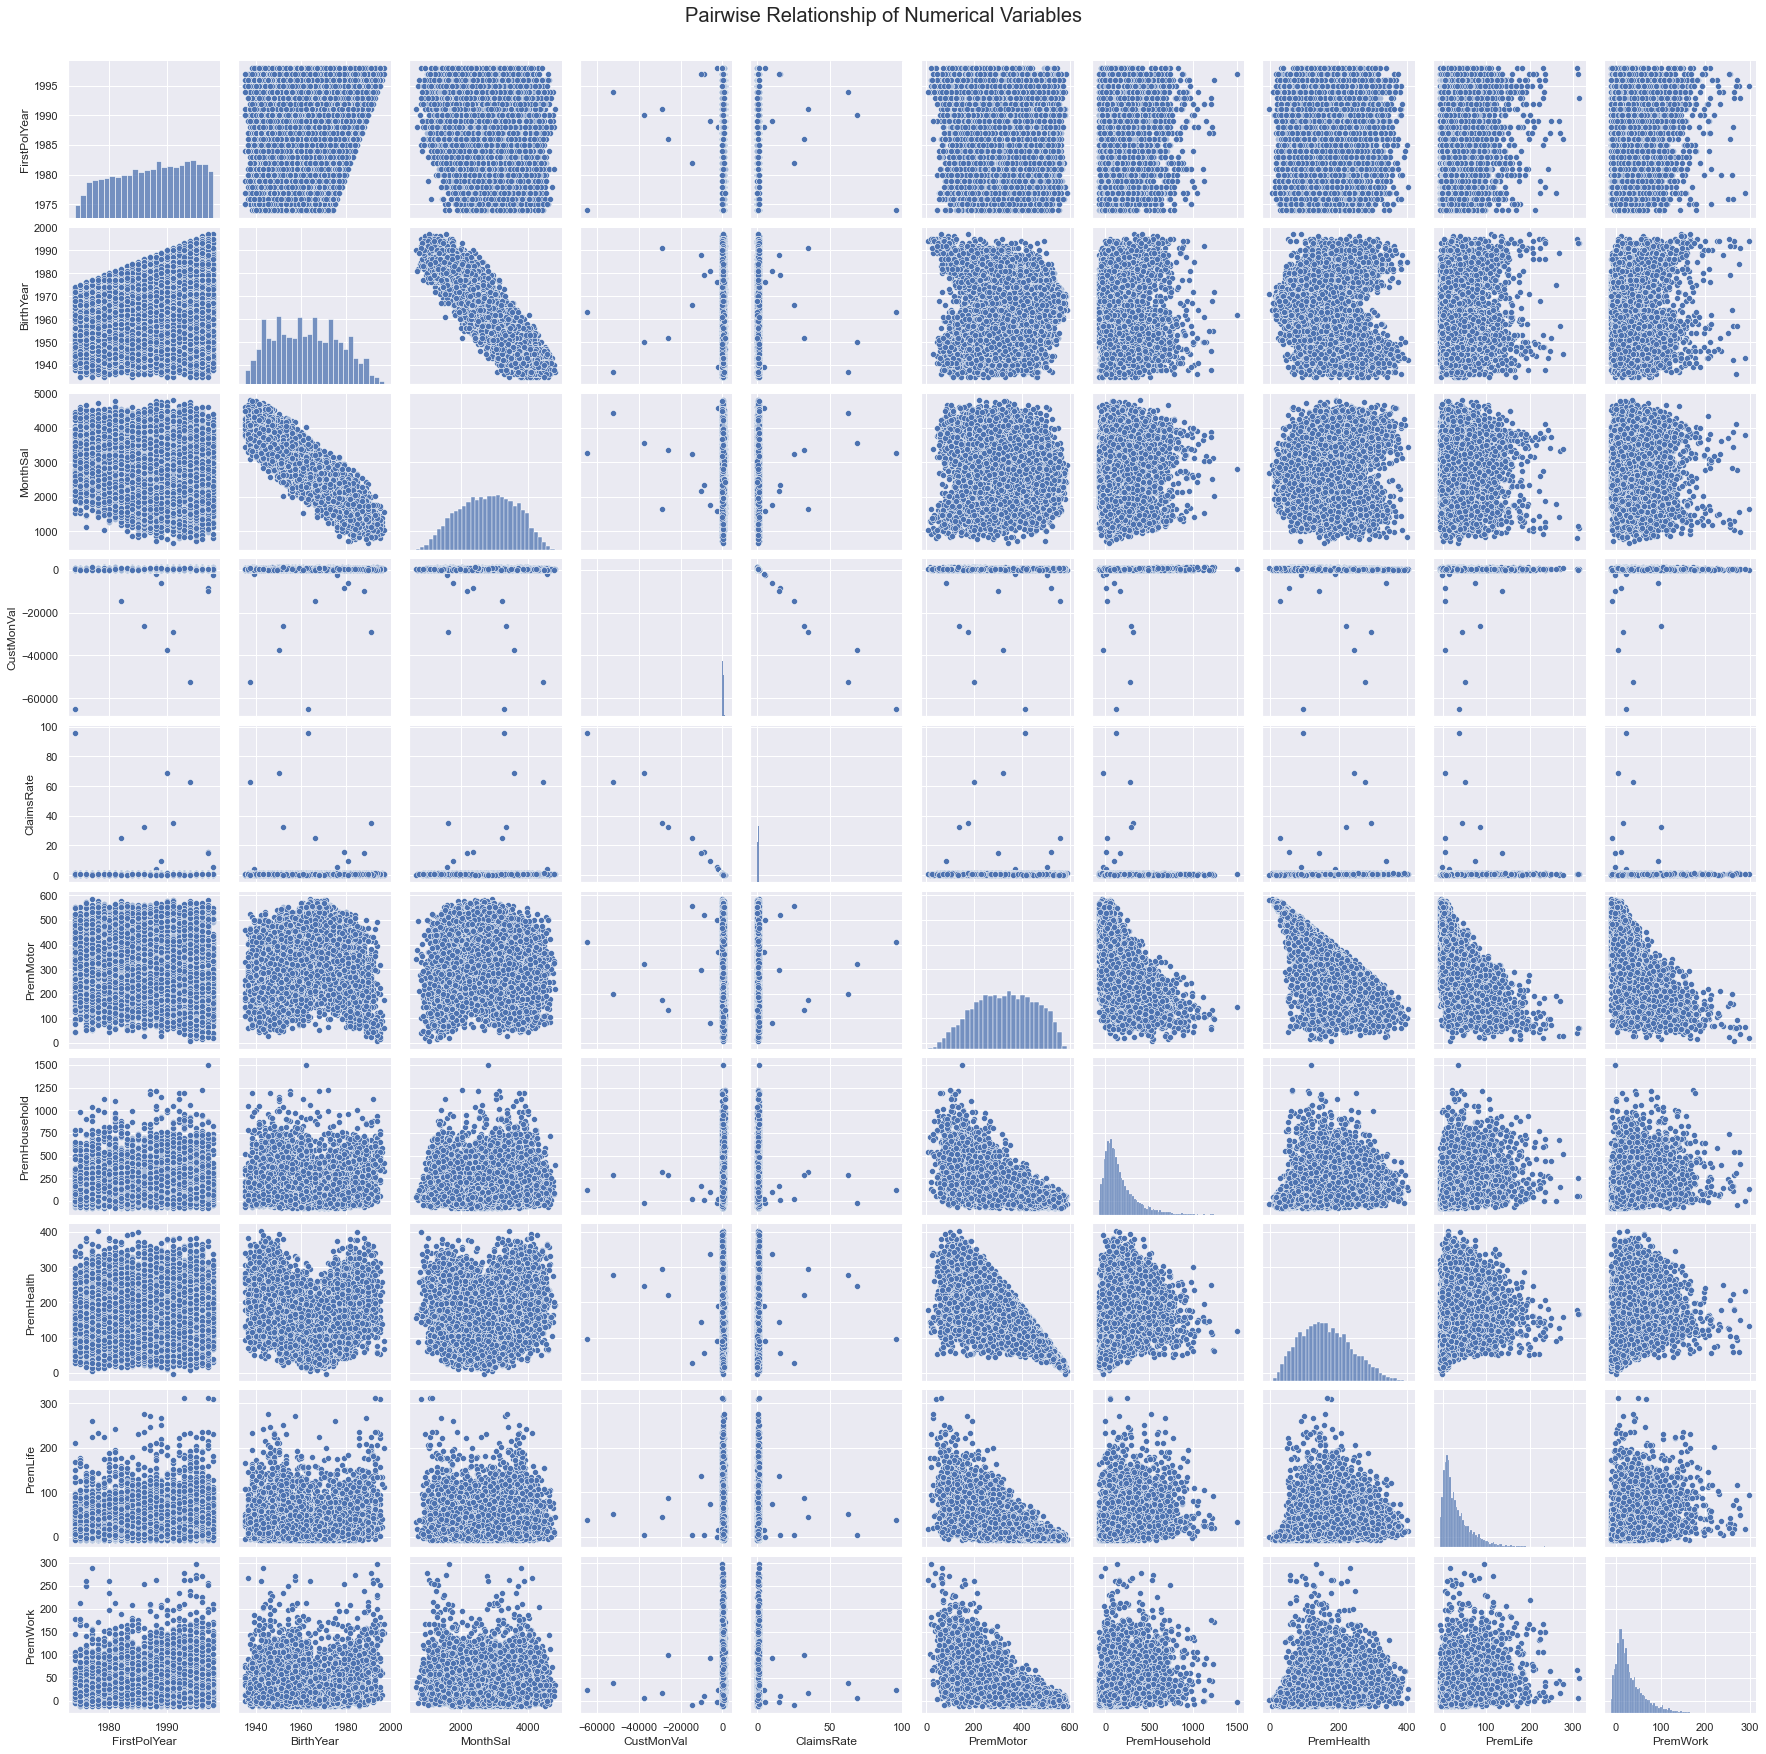

In [31]:
# Pairwise Relationship of Numerical Variables
sns.set()

# Setting pairplot
sns.pairplot(df[metric_feat], diag_kind='hist')

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)

plt.show()

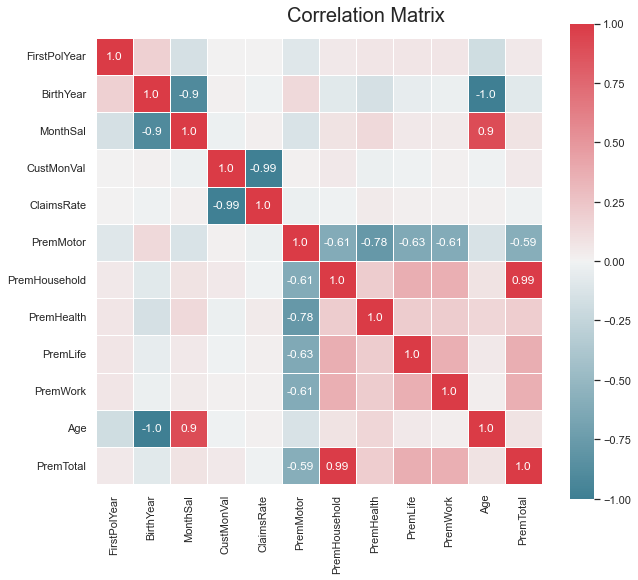

In [32]:
# Prepare figure
fig = plt.figure(figsize=(10, 8))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(df[metric_feat+['Age']+['PremTotal']].corr(method="pearson"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) # Try to understand what this np.where() does

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=20)

plt.show()